# Importações do Python para o código -

In [ ]:
import sys
import time
from IPython.display import Image

# Estrutura de Dados e Funções Importantes - 

Primeiramente, será definida a árvore B, ou seja:

In [ ]:
"""
author = Mateor
referência(github) = https://gist.github.com/mateor/885eb950df7231f178a5
Sujeito a algumas alterações por Davi Juliano para adaptação ao projeto
PYTHON 3.3.5
"""

from __future__ import (nested_scopes, generators, division, absolute_import, with_statement,
                        print_function, unicode_literals)


class BTree(object):
  """A implementação da Árvore B com funções de busca e inserção. Capaz para qualquer ordem t"""

  class Node(object):
    """Um simples nó da Árvore B."""

    def __init__(self, t):
      self.keys = []
      self.children = []
      self.leaf = True
      # t é a ordem de parentesco da Árvore B. Nós precisam ter esse valor para definir tamanho máximo e splitting.
      self._t = t

    def split(self, parent, payload):
      """Splita um nó e reatribui chaves/filhos."""
      new_node = self.__class__(self._t)

      mid_point = self.size//2
      split_value = self.keys[mid_point]
      parent.add_key(split_value)

      # Adiciona chaves e filhos para o nó apropriado
      new_node.children = self.children[mid_point + 1:]
      self.children = self.children[:mid_point + 1]
      new_node.keys = self.keys[mid_point+1:]
      self.keys = self.keys[:mid_point]

      # Se o novo nó é filho, ele faz "seta" como nó interno
      if len(new_node.children) > 0:
        new_node.leaf = False

      parent.children = parent.add_child(new_node)
      if payload < split_value:
        return self
      else:
        return new_node

    @property
    def _is_full(self):
      return self.size == 2 * self._t - 1

    @property
    def size(self):
      return len(self.keys)

    def add_key(self, value):
      """Adiciona uma chave ao nó. Por definição, o nó terá espaço para a chave."""
      self.keys.append(value)
      self.keys.sort()

    def add_child(self, new_node):
      """
      Adiciona um filho a um nó. Isso classificará os filhos do nó, permitindo que os filhos
      sejam ordenados mesmo após a divisão dos nós do meio.
      Retorna uma lista de ordem de nós filhos
      """
      i = len(self.children) - 1
      while i >= 0 and self.children[i].keys[0] > new_node.keys[0]:
        i -= 1
      return self.children[:i + 1]+ [new_node] + self.children[i + 1:]


  def __init__(self, t):
    """
    Cria a Árvore B. t é a ordem da árvore. A árvore não tem chaves quando criada.
    Esta implementação permite valores-chave duplicados, embora isso não tenha sido verificado
    vigorosamente.
    """
    self._t = t
    if self._t <= 1:
      raise ValueError("A Árvore B precisa ter ordem 2 ou mais.")
    self.root = self.Node(t)

  def insert(self, payload):
    """Insere uma nova chave de valor na Árvore B."""
    node = self.root
    # A raiz é tratada explicitamente, pois requer a criação de 2 novos nós em vez do usual.
    if node._is_full:
      new_root = self.Node(self._t)
      new_root.children.append(self.root)
      new_root.leaf = False
      #o nó está sendo definido como o nó que contém os intervalos que desejamos para a inserção (Devido à ordem dos elementos)
      node = node.split(new_root, payload)
      self.root = new_root
    while not node.leaf:
      i = node.size - 1
      while i > 0 and payload < node.keys[i] :
        i -= 1
      if payload > node.keys[i]:
        i += 1

      next = node.children[i]
      if next._is_full:
        node = next.split(node, payload)
      else:
        node = next
    #Desde que nós splitamos todos os nós cheios em novos nós, nós podemos simplesmente inserir os valores na folha.
    node.add_key(payload)

  def search(self, value, node=None):
    """Retorna 1 se a Árvore B contiver uma chave que corresponda ao valor e 0 no contrário."""
    if node is None:
      node = self.root
    if value in node.keys:
      return 1
    elif node.leaf:
      #Se estivermos em uma folha, não há mais o que verificar.
      return 0
    else:
      i = 0
      while i < node.size and value > node.keys[i]:
        i += 1
      return self.search(value, node.children[i])

  def print_order(self):
    """Imprima uma representação de ordem de nível."""
    this_level = [self.root]
    while this_level:
      next_level = []
      output = ""
      for node in this_level:
        if node.children:
          next_level.extend(node.children)
        output += str(node.keys) + " "
      print(output)
      this_level = next_level

Agora serão definidas as funções que irão lidar com a estrutura de dados, com o plot das imagens e com sua submissão na Árvore B, ou seja:

In [ ]:
def insere_catalogo(arvore, string):
  for i in range(1,6):
    arvore.insert(string+str(i))

def printa_imagem(string):
  display(Image(string+'.jpg'))

def procura_nome_na_Arv_B(arvore, string):
  a = arvore.search(string)
  if a == 1:
    print("O nó", string , "foi encontrado\n")
    printa_imagem(string)
  else:
    print("O nó", string, "não foi encontrado\n")

def procura_na_Arv_B(arvore, string):
  for i in range(1,6):
    auxstr = string+str(i)
    a = arvore.search(auxstr)
    if a == 1:
      print("O nó", auxstr , "foi encontrado\n")
      printa_imagem(auxstr)
    else:
      print("O nó", auxstr, "não foi encontrado\n")

# Aplicação na Árvore B - 

Primeiramente, a criação de uma árvore B de ordem 3, e lidaremos com a inserção de tão somente uma imagem no banco de imagens e o plot da mesma, além da análise de complexidade:

Tempo de execução da inserção da imagem: 7.915496826171875e-05 segundos
['caderno1'] 
O nó caderno1 foi encontrado



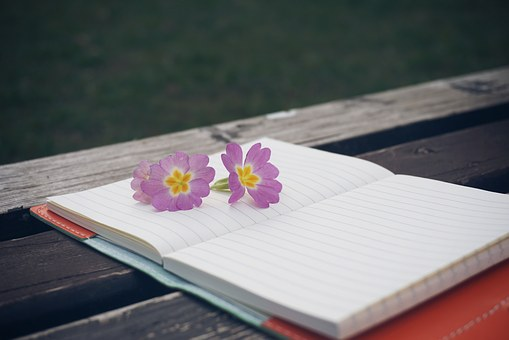

Tempo de execução da busca e do plot da imagem: 0.006859540939331055 segundos


In [ ]:
####Criação da Árvore B no problema dado, ou seja, Árvore B com t=3####
arv = BTree(3)

####Inserção de uma imagem à árvore####
ini=time.time()
nome='caderno1'
arv.insert(nome)
fim=time.time()

print(f'Tempo de execução da inserção da imagem: {fim-ini} segundos')

####Print da árvore com 1 elemento####
arv.print_order()

####Print da imagem e da árvore B####
ini=time.time()
procura_nome_na_Arv_B(arv, nome)
fim=time.time()

print(f'Tempo de execução da busca e do plot da imagem: {fim-ini} segundos')

Agora iremos adicionar todos os catálogos e buscar um catálogo a gosto do usuário:

In [ ]:
####Criação da Árvore B no problema dado, ou seja, Árvore B com t=3####
arvore = BTree(3)

####Inserir todos as imagens na árvore B usando do repositório e pasta do Colab-Google####
ini=time.time()

insere_catalogo(arvore, 'gato')
insere_catalogo(arvore, 'cafe')
insere_catalogo(arvore, 'camera')
insere_catalogo(arvore, 'computador')
insere_catalogo(arvore, 'diversao')
insere_catalogo(arvore, 'doce')
insere_catalogo(arvore, 'flor_amarela')
insere_catalogo(arvore, 'flor_branca')
insere_catalogo(arvore, 'flor_rosa')
insere_catalogo(arvore, 'flor_roxa')
insere_catalogo(arvore, 'frutas')
insere_catalogo(arvore, 'mesa')
insere_catalogo(arvore, 'neve')
insere_catalogo(arvore, 'notebook')
insere_catalogo(arvore, 'objeto')
insere_catalogo(arvore, 'pessoas_flor')
insere_catalogo(arvore, 'pincel')
insere_catalogo(arvore, 'pipoca')
insere_catalogo(arvore, 'tecnologia')
insere_catalogo(arvore, 'trabalho')

fim= time.time()

print(f'Tempo de execução da inserção dos catálogos: {fim-ini} segundos')

####Após inserir, iremos verificar como está a Árvore B, e fica aparente a altura da mesma também####
arvore.print_order()

Tempo de execução da inserção dos catálogos: 0.0007679462432861328 segundos
['flor_amarela2', 'mesa1'] 
['camera4', 'diversao3'] ['flor_rosa1', 'flor_roxa5'] ['neve5', 'objeto4', 'pincel3'] 
['cafe3', 'camera1'] ['computador2', 'computador5'] ['doce1', 'doce4'] ['flor_amarela5', 'flor_branca3'] ['flor_rosa4', 'flor_roxa2'] ['frutas3', 'gato3'] ['mesa4', 'neve2'] ['notebook3', 'objeto1'] ['pessoas_flor2', 'pessoas_flor5'] ['pipoca1', 'pipoca4', 'tecnologia2', 'tecnologia5'] 
['cafe1', 'cafe2'] ['cafe4', 'cafe5'] ['camera2', 'camera3'] ['camera5', 'computador1'] ['computador3', 'computador4'] ['diversao1', 'diversao2'] ['diversao4', 'diversao5'] ['doce2', 'doce3'] ['doce5', 'flor_amarela1'] ['flor_amarela3', 'flor_amarela4'] ['flor_branca1', 'flor_branca2'] ['flor_branca4', 'flor_branca5'] ['flor_rosa2', 'flor_rosa3'] ['flor_rosa5', 'flor_roxa1'] ['flor_roxa3', 'flor_roxa4'] ['frutas1', 'frutas2'] ['frutas4', 'frutas5', 'gato1', 'gato2'] ['gato4', 'gato5'] ['mesa2', 'mesa3'] ['mesa5', 'n

In [ ]:
####Input do usuário buscando no banco de imagens um catálogo que quer ver####
string = input('Coloque o catálogo que deseja buscar:')

print('\n')

ini=time.time()
procura_na_Arv_B(arvore, string)
fim=time.time()

print(f'Tempo de execução da busca por um catálogo ({string}): {fim-ini} segundos')

Coloque o catálogo que deseja buscar:jogo


O nó jogo1 não foi encontrado

O nó jogo2 não foi encontrado

O nó jogo3 não foi encontrado

O nó jogo4 não foi encontrado

O nó jogo5 não foi encontrado

Tempo de execução da busca por um catálogo (jogo): 0.001234292984008789 segundos
